### Harvard GSD  J-Term 2022 
### Introduction to Data Science for Building Simulation and Architectural Design
***
Instructor: Jung Min Han, jhan2@gsd.harvard.edu <br>
Date/Time: Jan 3-7/ 10:00 - 11:30 a.m. <br>
***

Pease copy this colab notebook and rename it before you start! 

---


In [1]:
# import library
import numpy as np
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Load data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [40]:
# pandas data frame from csv
def GetPandasFromFileCSV(path):
    return pd.read_csv(path, delimiter=',')
def getPandasFromFile(path, fileName, theSkipRow):
    path = os.path.join(path , fileName)
    return pd.read_csv(path, skiprows= theSkipRow , header=None, index_col = False)
def SavePandasToCSV(d, path):
    d.to_csv(path)
    return "done!!"

# modify the following file path for your GoogleDrive
FILEPATH = '/content/drive/My Drive/Colab Notebooks/J_Term/data/'

df =GetPandasFromFileCSV(FILEPATH+"HouseZero_full.csv")
df= df[:200] 

In [34]:
df.head()

,Temp,WS,WD
0,4.400000,2.600000,178.000000
1,4.400000,2.283333,182.416667
2,6.311000,2.106667,175.783333
3,7.026988,2.037349,185.168675
4,7.938321,1.109489,235.072993


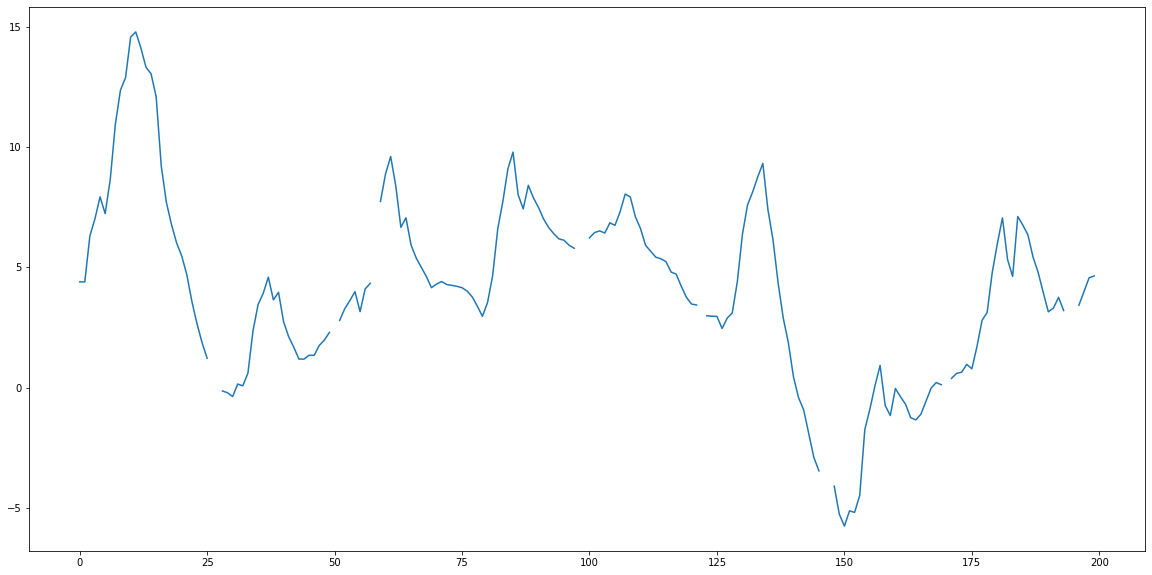

In [5]:
## Visualize Temperature data

plt.figure(figsize=(20,10))
### Your code here
df["Temp"].plot()


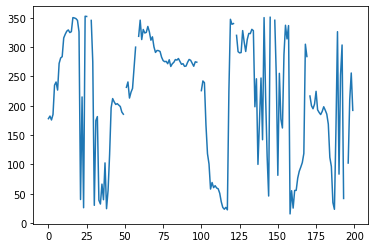

In [7]:
df["WD"].plot()

## 2.Imputing missing values

### Mean imputation

In [8]:
import numpy as np
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
###Fit the model with data
X = df[["Temp"]]
### Your code here
imp_mean.fit(X)
meanLst = imp_mean.transform(X)

In [11]:
# meanLst

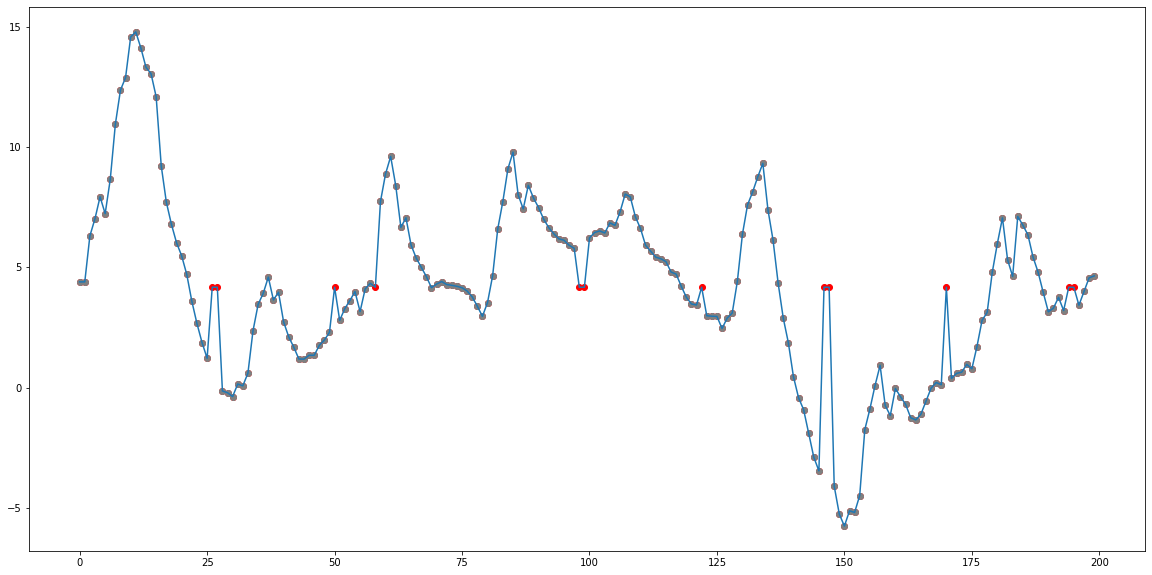

In [12]:
plt.figure(figsize=(20,10))
plt.scatter(df.index, meanLst, color="r")
plt.scatter(df.index, X, color="grey")

plt.plot(meanLst.tolist())

##Median Imputation

In [15]:
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
###Fit the model with data
### Your code here
X = df[["WS"]]
imp_median.fit(X)
medianLst = imp_median.transform(X)

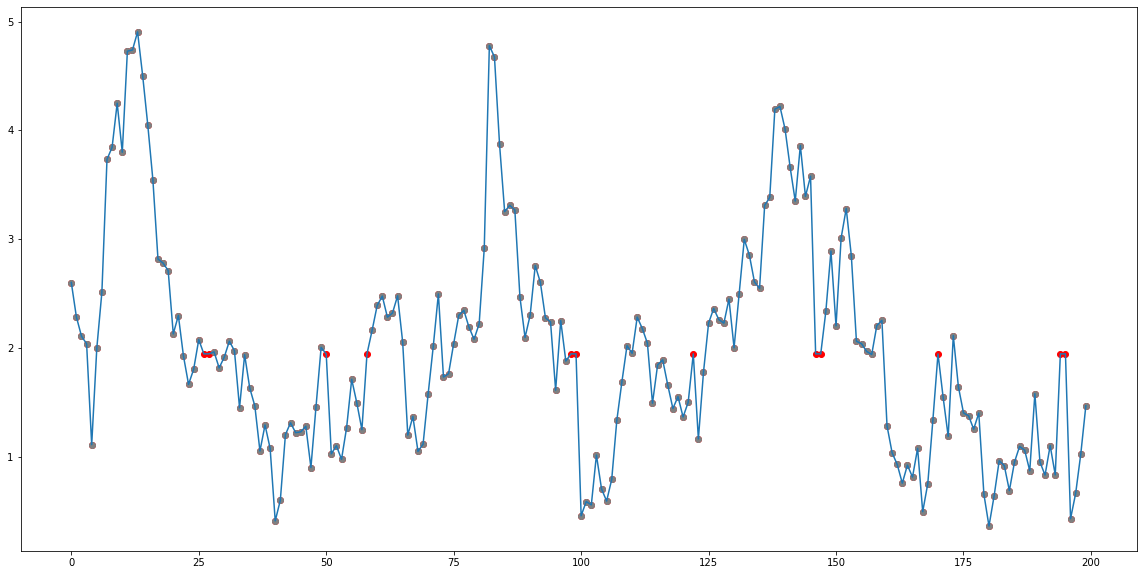

In [16]:
plt.figure(figsize=(20,10))
plt.scatter(df.index, medianLst, color="r")
plt.scatter(df.index, X, color="grey")

plt.plot(medianLst.tolist())

### Zero imputation

In [31]:
df["Temp"].tolist()

[4.400000095367443,
 4.400000095367443,
 6.310999957720441,
 7.026987949049609,
 7.938321165794914,
 7.239171586798526,
 8.666038568469038,
 10.960908909036686,
 12.375694274902337,
 12.89693888839412,
 14.584583481152848,
 14.79662358915646,
 14.130390793085072,
 13.330714140619614,
 13.055628759418425,
 12.102815219334184,
 9.222370352568497,
 7.712839497460276,
 6.792454489794626,
 6.028956409122629,
 5.485555383894143,
 4.714545423334293,
 3.595312517136304,
 2.6713491905303104,
 1.8768939141071268,
 1.2245945619033054,
 5.0,
 5.0,
 -0.13623852863767205,
 -0.20999999344347087,
 -0.3695384564307898,
 0.1523555371496362,
 0.07745454878632628,
 0.6033684275652126,
 2.369017830916833,
 3.4615151195815086,
 3.923313218426965,
 4.597120465007743,
 3.65085360771268,
 3.968563233298808,
 2.737361124820189,
 2.1162903529982837,
 1.6823275603097405,
 1.1913600006103466,
 1.1880315035347206,
 1.3488889027524484,
 1.3468182073398125,
 1.7586666968134068,
 1.9819718347469164,
 2.303538443492006

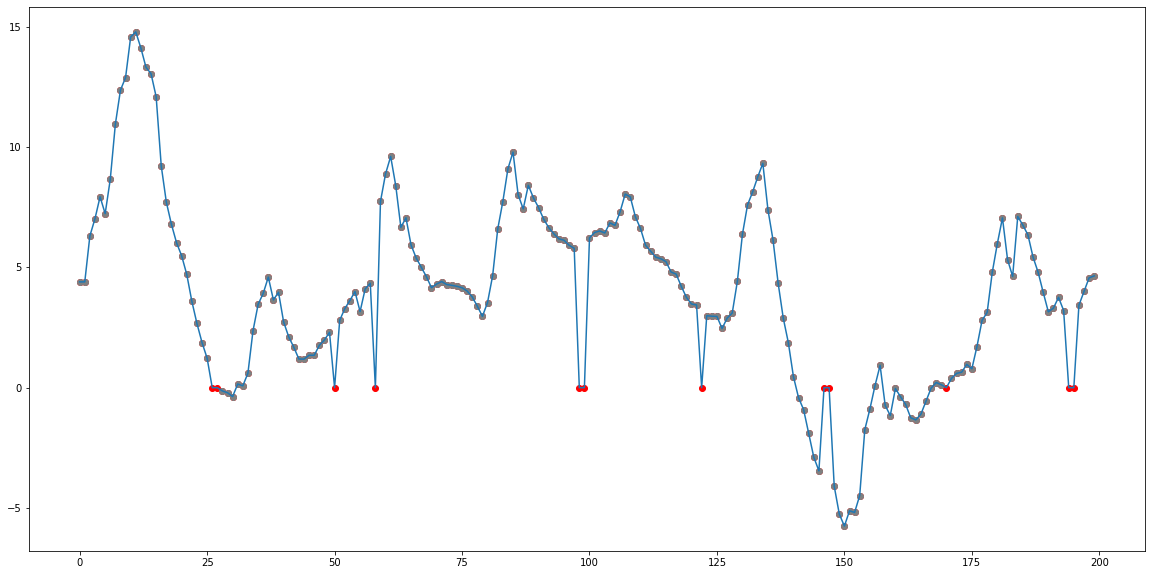

In [35]:
### Replace Null values to 0
### Your code here

Y = df[["Temp"]]
dfnull = df[df["Temp"].isnull()]
dfnull_index =  dfnull.index
df["Temp"][dfnull_index] = 0

plt.figure(figsize=(20,10))
plt.scatter(df.index, df["Temp"], color="r")
plt.scatter(df.index, Y, color="grey")

plt.plot(df["Temp"].tolist())

### KNN imputation

In [41]:
from sklearn.neighbors import KNeighborsRegressor as KNN

# prepare data for training KNN
dfnull = df[df["Temp"].isnull()]
dfnull_index = dfnull.index
dfnull_index = dfnull_index.values.reshape((dfnull_index.shape[0], 1))
dfnotnull = df[df["Temp"].notnull()]
dfnotnull_index = dfnotnull.index
dfnotnull_index = dfnotnull_index.values.reshape((dfnotnull_index.shape[0], 1))

In [42]:
dfnull_index

array([[ 26],
       [ 27],
       [ 50],
       [ 58],
       [ 98],
       [ 99],
       [122],
       [146],
       [147],
       [170],
       [194],
       [195]])

In [43]:
#fit model, predict and evaluate
k = 5
### Your code here

neighbors = KNN(n_neighbors=k)
neighbors.fit(dfnotnull_index, dfnotnull["Temp"])
y_pred = neighbors.predict(dfnull_index)

y_pred

array([ 1.08531983,  0.4771423 ,  2.79941646,  5.65045526,  6.10788613,
        6.18554133,  3.32917603, -3.52156655, -4.29328492,  0.25906411,
        3.54193033,  3.79410809])

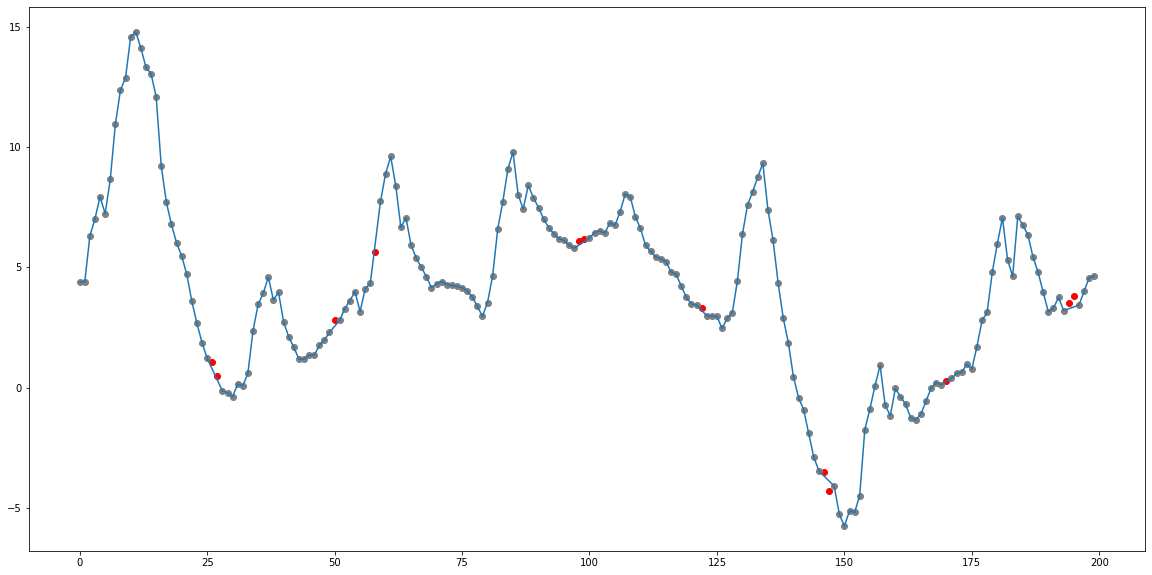

In [44]:
plt.figure(figsize=(20,10))
plt.scatter(dfnull_index, y_pred, color="r")
plt.scatter(dfnotnull_index, dfnotnull["Temp"], color="grey")
plt.plot( dfnotnull["Temp"])

## 3. Data Sampling

In [45]:
!pip install pyDOE

  Created wheel for pyDOE: filename=pyDOE-0.3.8-py3-none-any.whl size=18184 sha256=cb3395c1830d54369806fc59b0e5d17224fd25812dc9acf8898f4756dd82e5de
  Stored in directory: /root/.cache/pip/wheels/83/ce/8a/87b25c685bfeca1872d13b8dc101e087a9c6e3fb5ebb47022a
Successfully built pyDOE


In [46]:
import pyDOE as doe
import numpy as np
import altair as alt
import pandas as pd

In [47]:
## Import data to pandas dataframe
dataRad = pd.read_csv(FILEPATH+'Viz_refer.csv', sep=",", header=None)

dataRad

,0,1,2,3
0,19.5,20.0,0.5,330.7
1,19.5,20.0,1.5,348.8
2,19.5,20.0,2.5,355.2
3,19.5,20.0,3.5,357.8
4,19.5,20.0,4.5,369.3
...,...,...,...,...
3035,1.5,13.5,14.0,83.8
3036,2.5,13.5,14.0,74.9
3037,3.5,13.5,14.0,69.2
3038,4.5,13.5,14.0,64.3


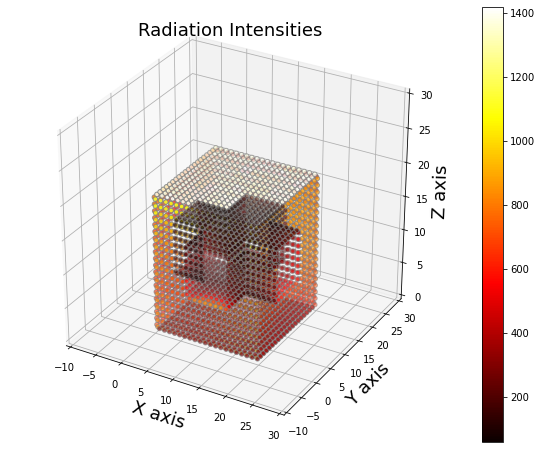

In [48]:
### Visualize data in 3D plot

my_cmap = plt.cm.hot

fig = plt.figure(figsize=(22,8))
ax1 = fig.add_subplot(122, projection='3d')
im = ax1.scatter(dataRad[0], dataRad[1], dataRad[2], 
                 s=20, c=dataRad[3], cmap=my_cmap, edgecolors='grey')

ax1.set_xlabel('X axis', fontsize =18)
ax1.set_ylabel('Y axis', fontsize =18)
ax1.set_zlabel('Z axis', fontsize =18)
ax1.set_xlim(-10, 30)
ax1.set_ylim(-10, 30)
ax1.set_zlim(0, 30)
ax1.set_title('Radiation Intensities', fontsize =18)
plt.colorbar(im)

plt.show()


### Pandas random sampling with number of samples



In [51]:
## Simple random sampling pandas dataframe
### Your code here

SampledRad = dataRad.sample(n = 2000)

SampledRad 

,0,1,2,3
2486,7.5,7.5,6.0,172.8
2625,7.5,10.5,14.0,89.7
803,6.5,0.0,19.5,1090.7
1008,20.0,0.5,0.5,633.5
1211,20.0,12.5,19.5,866.9
...,...,...,...,...
1856,5.5,12.5,20.0,1388.7
597,0.0,3.5,5.5,476.1
1833,4.5,9.5,20.0,1369.8
1866,6.5,2.5,20.0,1402.4


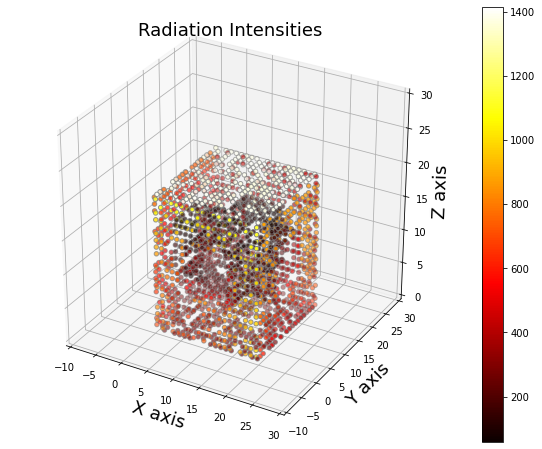

In [52]:
fig = plt.figure(figsize=(22,8))
ax1 = fig.add_subplot(122, projection='3d')
im = ax1.scatter(SampledRad[0], SampledRad[1], SampledRad[2], 
                 s=20, c=SampledRad[3], cmap=my_cmap, edgecolors='grey')

ax1.set_xlabel('X axis', fontsize =18)
ax1.set_ylabel('Y axis', fontsize =18)
ax1.set_zlabel('Z axis', fontsize =18)
ax1.set_xlim(-10, 30)
ax1.set_ylim(-10, 30)
ax1.set_zlim(0, 30)
ax1.set_title('Radiation Intensities', fontsize =18)
plt.colorbar(im)

plt.show()

### Pandas random sampling with fraction

Number of Samples: 2736


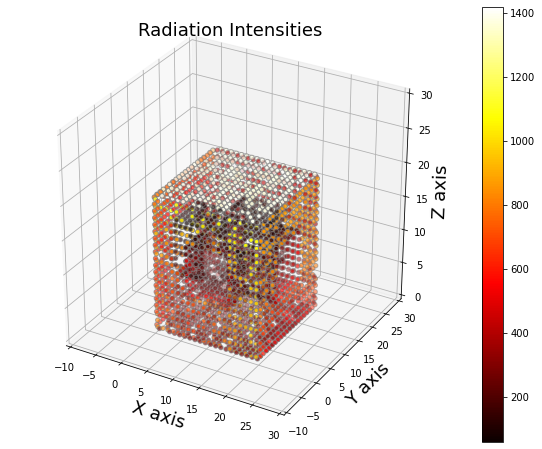

In [57]:
#@title Modify the sampling resolution { run: "auto" }
frac = 0.9 #@param {type:"slider", min:0, max:1, step:0.1}

### Your code here

sample = dataRad.sample(frac=frac)

print("Number of Samples:",len(sample))

fig = plt.figure(figsize=(22,8))
ax1 = fig.add_subplot(122, projection='3d')
im = ax1.scatter(sample[0], sample[1], sample[2], 
                 s=20, c=sample[3], cmap=my_cmap, edgecolors='grey')

ax1.set_xlabel('X axis', fontsize =18)
ax1.set_ylabel('Y axis', fontsize =18)
ax1.set_zlabel('Z axis', fontsize =18)
ax1.set_xlim(-10, 30)
ax1.set_ylim(-10, 30)
ax1.set_zlim(0, 30)
ax1.set_title('Radiation Intensities', fontsize =18)
plt.colorbar(im)

plt.show()

### Pandas sampling Weighted Samples

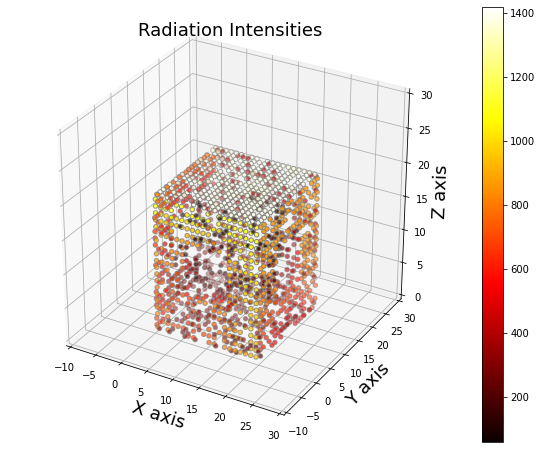

In [61]:
#@title Modify the sampling resolution { run: "auto" }
index = 3 #@param {type:"slider", min:0, max:3, step:1}

# Weighted sample 
### Your code here

sample = dataRad.sample(n=1500, weights=dataRad[index])

fig = plt.figure(figsize=(22,8))
ax1 = fig.add_subplot(122, projection='3d')
im = ax1.scatter(sample[0], sample[1], sample[2], 
                 s=20, c=sample[3], cmap=my_cmap, edgecolors='grey')

ax1.set_xlabel('X axis', fontsize =18)
ax1.set_ylabel('Y axis', fontsize =18)
ax1.set_zlabel('Z axis', fontsize =18)
ax1.set_xlim(-10, 30)
ax1.set_ylim(-10, 30)
ax1.set_zlim(0, 30)
ax1.set_title('Radiation Intensities', fontsize =18)
plt.colorbar(im)

plt.show()

### Pandas Sampling Every nth Item

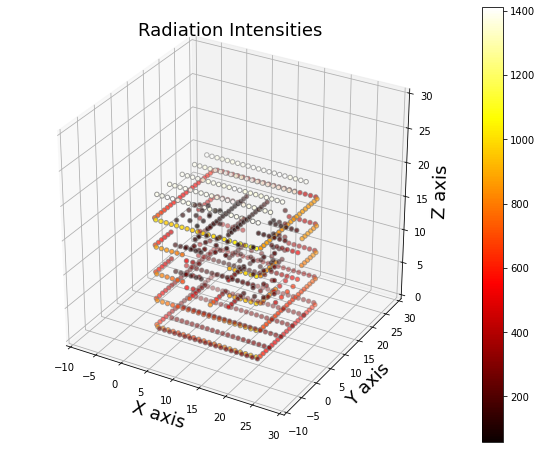

In [63]:
### Your code here

sample = dataRad[::4]

fig = plt.figure(figsize=(22,8))
ax1 = fig.add_subplot(122, projection='3d')
im = ax1.scatter(sample[0], sample[1], sample[2], 
                 s=20, c=sample[3], cmap=my_cmap, edgecolors='grey')

ax1.set_xlabel('X axis', fontsize =18)
ax1.set_ylabel('Y axis', fontsize =18)
ax1.set_zlabel('Z axis', fontsize =18)
ax1.set_xlim(-10, 30)
ax1.set_ylim(-10, 30)
ax1.set_zlim(0, 30)
ax1.set_title('Radiation Intensities', fontsize =18)
plt.colorbar(im)

plt.show()

In [64]:
SampledRad.to_csv('sample.csv',index=False)